In [1]:
import pandas as pd
import csv
import os
print(os.getcwd())
all_data = []
with open('sum-interpret/output_fast.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',',)
    for row in spamreader:
        if row[-3] == '0':
            continue
        all_data.append(row)
import numpy as np


/home/jcxu


In [2]:
key = all_data[0]
data = all_data[1:]
import statistics
import random
print(key)
print(data[0])
print(len(data))

import seaborn as sns

import matplotlib.colors as mcolors

colors =[ 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
colors = mcolors.TABLEAU_COLORS


['', 'lm2imp', 'lm2full', 'lm2imp_cnn', 'lm2full_cnn', 'lm2attn', 'imp2lm', 'imp2full', 'imp2imp_cnn', 'imp2full_cnn', 'imp2attn', 'full2lm', 'full2imp', 'full2imp_cnn', 'full2full_cnn', 'full2attn', 'imp_cnn2lm', 'imp_cnn2imp', 'imp_cnn2full', 'imp_cnn2full_cnn', 'imp_cnn2attn', 'full_cnn2lm', 'full_cnn2imp', 'full_cnn2full', 'full_cnn2imp_cnn', 'full_cnn2attn', 'attn2lm', 'attn2imp', 'attn2full', 'attn2imp_cnn', 'attn2full_cnn', 'pos', 'tok', 't', 'T', 'prefix']
['1', '2.000000238418579', '2.0', '2.000000238418579', '2.0', '2.0', '2.000000238418579', '0.46805328130722046', '1.9955065250396729', '1.7394658327102661', '2.000000238418579', '2.0', '0.46805328130722046', '1.9955065250396729', '1.6336421966552734', '2.0', '2.000000238418579', '1.9955065250396729', '1.9955065250396729', '1.3946596384048462', '1.9179941415786743', '2.0', '1.7394658327102661', '1.6336421966552734', '1.3946596384048462', '1.8253583908081055', '2.0', '2.000000238418579', '2.0', '1.9179941415786743', '1.82535839

In [3]:
dict_pos = {}
index_of_pos = key.index('pos')
index_of_full2lm = key.index('full2lm')
index_of_lm2full = key.index('lm2full')

index_of_lm2imp = key.index('lm2imp')
index_of_imp2lm = key.index('imp2lm')

index_of_impood2imp = key.index('imp_cnn2imp')


index_of_imp2full = key.index('imp2full')
index_of_full2imp = key.index('full2imp')


index_of_tok = key.index('tok')



x = []
y = []
c = []
cnt = 0
d_color = {}
for d in data:
    pos = d[index_of_pos]
    # print(d)
    if d[index_of_imp2full] == '' or d[index_of_impood2imp] =="":
        continue
    v_lm2imp = float(d[index_of_impood2imp]) 
    v_imp2full = float(d[index_of_imp2full])
    if v_lm2imp >1.5 and v_imp2full< 0.5:
        print(d[-4:])
    # if v_lm2imp>6.1 or v_imp2full>9.7:
        # continue
    x.append(v_lm2imp)
    y.append(v_imp2full)
    c.append(pos)
    # if pos in d_color:
    #     c.append(d_color[pos])
    # else:
    #     d_color[pos] = cnt
    #     cnt+=1
    #     c.append(d_color[pos])

from statistics import quantiles
print([round(q, 1) for q in quantiles(x, n=10)])
print([round(q, 1) for q in quantiles(y, n=10)])

['number', '1', '20', '<s>']
['in', '1', '23', 'Rangers in Kenya say they are hunt']
['BBC', '25', '26', "Some seats in Somalia's indirect elections should be re-run because of corruption, the head of the electoral commission has told the "]
['with', '13', '26', 'The 2016 Olympic football tournament gets under way in Rio on Wednesday, ']
['Herzegovina', '2', '21', 'Bosnia-']
['country', '7', '21', 'Bosnia-Herzegovina is not a small ']
['Busch', '2', '20', 'Anheuser-']
['the', '5', '20', 'Anheuser-Busch InBev, ']
['world', '6', '20', 'Anheuser-Busch InBev, the ']
['-', '21', '26', 'One person has been arrested on suspicion of murder after a man was shot in the head in a suspected murder']
['of', '2', '23', 'The head ']
['email', '21', '23', 'The head of the FBI, James Comey, is to face questions for the first time about the Hillary Clinton ']
["'s", '3', '19', 'A leading children']
['city', '20', '21', 'A woman killed in the Manchester Arena attack had been due to meet Ariana Grande at 

In [4]:
from sklearn.cluster import KMeans
inp_kmeans = [[r,c] for r,c in zip(x,y)]
inp_kmeans = np.asarray(inp_kmeans)
kmeans = KMeans(n_clusters=1, random_state=0).fit(inp_kmeans)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
labels = kmeans.labels_
print(labels)

[[1.02642817 1.13010482]]
1626.8869769058597
[0 0 0 ... 0 0 0]


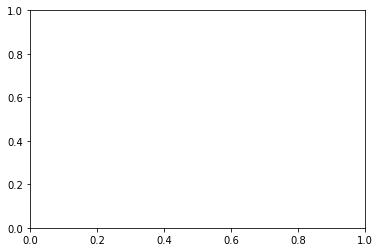

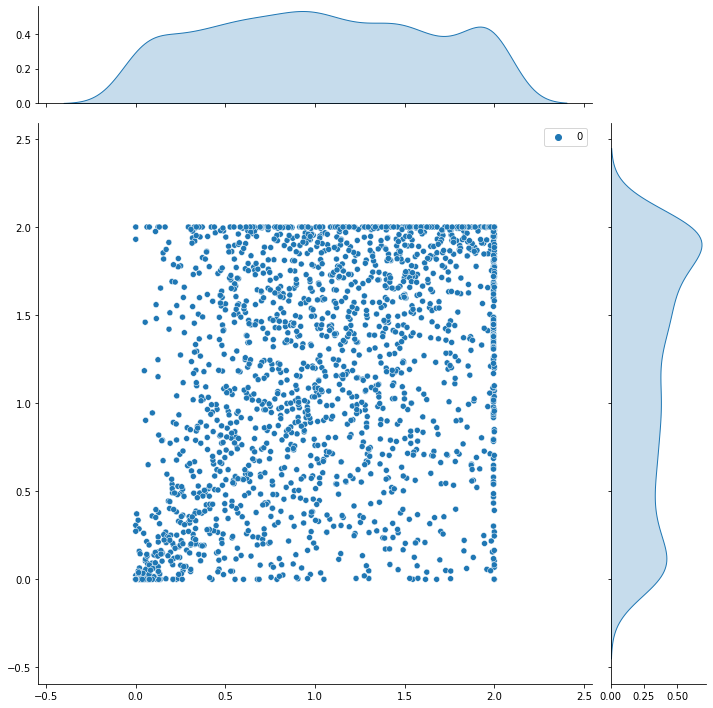

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
# sns.relplot(x=x, y=y,)

# scatter = ax.scatter(x, y,s=1,c=c)
sns.jointplot(x=x,y=y,hue=labels,marginal_ticks=True,height=10)

